In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

In [0]:
# Get dataset
X_pos, X_neg = [], []
for f in os.listdir('.'):
    if "jpeg" in f:
        X_pos.append(plt.imread(f))
X_pos = np.array(X_pos)
y_pos = np.ones((X_pos.shape[0], 1))
for f in os.listdir('sample_data'):
    if "jpeg" in f:
        X_neg.append(plt.imread('sample_data/' + f))
X_neg = np.array(X_neg)
# Undersample to correct class imbalance: 2.87% of images contain a pool.
np.random.shuffle(X_neg)
X_neg = X_neg[:X_pos.shape[0]]
y_neg = np.zeros((X_neg.shape[0], 1))

X = np.concatenate((X_pos, X_neg)) / 255
y = np.concatenate((y_pos, y_neg))

# Shuffle data to mix pos and neg
i = np.random.permutation(X.shape[0])
i_split = int(np.floor(0.8 * X.shape[0]))
X_train, X_test = X[i[:i_split]], X[i[i_split:]]
y_train, y_test = y[i[:i_split]], y[i[i_split:]]

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 input_shape=(256, 256, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['binary_accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32,
          validation_data=(X_test, y_test),
          class_weight={0: 0.9, 1: 0.1})

Train on 604 samples, validate on 152 samples
Epoch 1/20
604/604 [==============================] - 10s 17ms/sample - loss: 0.4736 - binary_accuracy: 0.5166 - val_loss: 0.7236 - val_binary_accuracy: 0.5263
Epoch 2/20
604/604 [==============================] - 9s 14ms/sample - loss: 0.3775 - binary_accuracy: 0.5728 - val_loss: 0.5463 - val_binary_accuracy: 0.6645
Epoch 3/20
604/604 [==============================] - 8s 14ms/sample - loss: 0.2458 - binary_accuracy: 0.7334 - val_loss: 0.4133 - val_binary_accuracy: 0.8487
Epoch 4/20
604/604 [==============================] - 8s 14ms/sample - loss: 0.2148 - binary_accuracy: 0.7732 - val_loss: 0.8989 - val_binary_accuracy: 0.6447
Epoch 5/20
604/604 [==============================] - 8s 13ms/sample - loss: 0.1871 - binary_accuracy: 0.7914 - val_loss: 0.3237 - val_binary_accuracy: 0.8487
Epoch 6/20
604/604 [==============================] - 8s 13ms/sample - loss: 0.1719 - binary_accuracy: 0.8344 - val_loss: 0.6778 - val_binary_accuracy: 0.7566

In [0]:
model.save('model.h5')

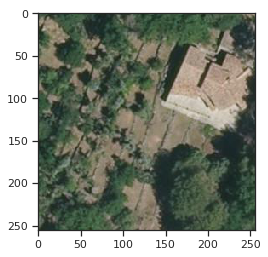

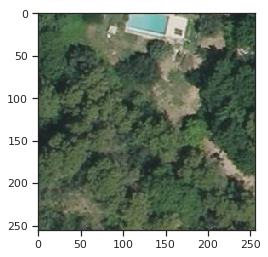

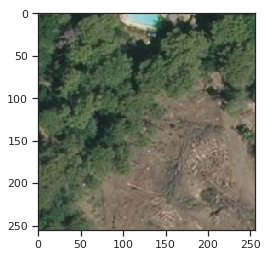

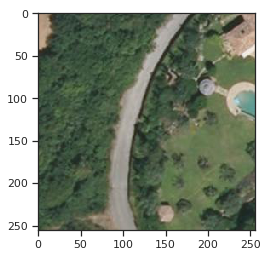

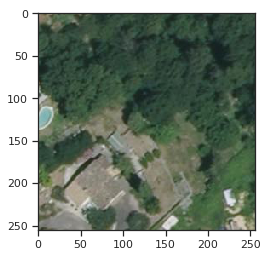

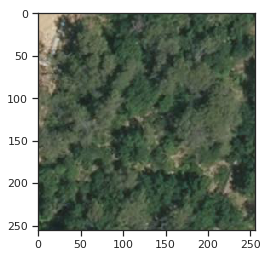

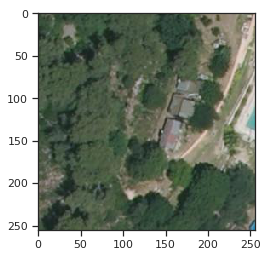

In [52]:
for x in X_test[(((model.predict(X_test) > 0.5) * 1) != y_test).flatten()]:
    plt.imshow(x)
    plt.show()